# HK-2022 cross section dataset

## Data import and drop unnecessary rows

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
#prevent SettingWithCopyWarning message from appearing
pd.options.mode.chained_assignment = None

hk_2022 = pd.read_csv('./Data/WK_2022.csv', dtype={'plz': object, 'kid2019': object, 'zimmeranzahl': object})

df_original = pd.DataFrame(hk_2022)

df_original['adat_year'] = df_original['adat'].astype(str).str[:4]
df_original['adat_year'] = pd.to_numeric(df_original['adat_year'])

number_of_transactions_per_year = df_original.groupby('adat_year')['obid'].count()
print(number_of_transactions_per_year)

object_features = ['ausstattung', 'balkon', 'denkmalobjekt', 'einbaukueche', 'etage', 'gaestewc', 'garten', 'haustier_erlaubt', 'kategorie_Wohnung', 'keller']
general_object_information = ['anzahletagen', 'bauphase', 'einliegerwohnung', 'immobilientyp', 'nebenraeume', 'rollstuhlgerecht', 'wohngeld']
area_information = ['grundstuecksflaeche', 'nutzflaeche']
energy_and_structure_information = ['energieausweistyp', 'energieeffizienzklasse', 'ev_kennwert', 'ev_wwenthalten', 'heizkosten', 'heizungsart', 'letzte_modernisierung']
price_information = ['parkplatzpreis']
regional_information = ['gid2019', 'kid2019', 'ergg_1km', 'blid']
meta_information_advertisement = ['click_customer', 'click_schnellkontakte', 'click_url', 'click_weitersagen', 'hits', 'laufzeittage', 'hits_gen']
technical_variables = ['bef1', 'bef2', 'bef3', 'bef4', 'bef5', 'bef6', 'bef7', 'bef8', 'bef9', 'bef10', 'anbieter', 'duplicateid', 'click_schnellkontakte_gen', 'click_weitersagen_gen', 'click_url_gen']
other_variables = ['liste_show', 'liste_match', 'liste_show_gen', 'liste_match_gen']
columns_to_drop = object_features + general_object_information + area_information + energy_and_structure_information + price_information + regional_information + meta_information_advertisement + technical_variables + other_variables
df_original.drop(columns=columns_to_drop, axis=1, inplace=True)

df = df_original[df_original['adat_year'] == 2022]

print(df.shape)
df.head()

adat_year
2019         1
2020       387
2021      9599
2022    139760
Name: obid, dtype: int64
(139760, 14)


,obid,plz,kaufpreis,baujahr,wohnflaeche,zimmeranzahl,schlafzimmer,badezimmer,aufzug,parkplatz,objektzustand,adat,price_sqm,adat_year
0,133605835,24939,160000.0,1920.0,78.0,3,2,1,No,Other missing,Needs renovation,2022m5,2051.2820,2022
1,134602680,24941,245000.0,1925.0,70.0,2,1,1,No,Yes,Well kempt,2022m6,3500.0000,2022
3,133881985,24941,199000.0,1965.0,65.0,3,Other missing,1,No,Other missing,Well kempt,2022m5,3061.5386,2022
4,136298000,24944,595000.0,1984.0,150.0,4,Other missing,Other missing,No,Yes,Not specified,2022m11,3966.6667,2022
5,138121059,24939,86000.0,NaN,39.0,2,Other missing,Other missing,No,Other missing,Not specified,2022m11,2205.1282,2022


## Cleaning of characteristics

In [10]:
df_characteristics = df_original[df_original['baujahr'].notna()]
df_characteristics['age'] = df_characteristics['adat_year'] - df_characteristics['baujahr']

df_characteristics = df_characteristics[df_characteristics['zimmeranzahl'].notna()]
df_characteristics = df_characteristics[~df_characteristics['zimmeranzahl'].str.contains("Implausible value")]
df_characteristics['zimmeranzahl'] = pd.to_numeric(df_characteristics['zimmeranzahl'])
df_characteristics = df_characteristics[(df_characteristics['zimmeranzahl'] > 0) & (df_characteristics['zimmeranzahl'] < 30)]

df_characteristics = df_characteristics[df_characteristics['schlafzimmer'].notna()]
df_characteristics = df_characteristics[~df_characteristics['schlafzimmer'].str.contains("Other missing")]
df_characteristics = df_characteristics[~df_characteristics['schlafzimmer'].str.contains("Implausible value")]
df_characteristics['schlafzimmer'] = pd.to_numeric(df_characteristics['schlafzimmer'])
df_characteristics = df_characteristics[(df_characteristics['schlafzimmer'] > 0) & (df_characteristics['schlafzimmer'] < 15)]

df_characteristics = df_characteristics[df_characteristics['badezimmer'].notna()]
df_characteristics = df_characteristics[~df_characteristics['badezimmer'].str.contains("Other missing")]
df_characteristics = df_characteristics[~df_characteristics['badezimmer'].str.contains("Implausible value")]
df_characteristics['badezimmer'] = pd.to_numeric(df_characteristics['badezimmer'])
df_characteristics = df_characteristics[(df_characteristics['badezimmer'] > 0) & (df_characteristics['badezimmer'] < 15)]

df_characteristics = df_characteristics[df_characteristics['wohnflaeche'].notna()]
df_characteristics['wohnflaeche'] = pd.to_numeric(df_characteristics['wohnflaeche'])
df_characteristics = df_characteristics[(df_characteristics['wohnflaeche'] > 0) & (df_characteristics['wohnflaeche'] < 5000)]

df_characteristics = df_characteristics[~df_characteristics['objektzustand'].str.contains("Not specified")]
df_characteristics = df_characteristics[~df_characteristics['objektzustand'].str.contains("By arrangement")]
df_characteristics['objektzustand'] = df_characteristics['objektzustand'].astype('category')
df_characteristics['objektzustand'] = df_characteristics['objektzustand'].cat.reorder_categories(['Dilapidated', 'Needs renovation', 'Well kempt', 'Modernised', 'Reconstructed', 'Completely renovated', 'Like new', 'First occupancy after reconstruction', 'First occupancy'], ordered=True)
df_characteristics['objektzustand'] = df_characteristics['objektzustand'].cat.codes

df_characteristics = df_characteristics[~df_characteristics['aufzug'].str.contains("Other missing")]
df_characteristics['aufzug'] = df_characteristics['aufzug'].astype('category')
df_characteristics['aufzug'] = df_characteristics['aufzug'].cat.reorder_categories(['No', 'Yes'], ordered=True)
df_characteristics['aufzug'] = df_characteristics['aufzug'].cat.codes

print(df_characteristics.shape)
df_characteristics.head()

(71952, 15)


,obid,plz,kaufpreis,baujahr,wohnflaeche,zimmeranzahl,schlafzimmer,badezimmer,aufzug,parkplatz,objektzustand,adat,price_sqm,adat_year,age
0,133605835,24939,160000.0,1920.0,78.0,3.0,2,1,0,Other missing,1,2022m5,2051.2820,2022,102.0
1,134602680,24941,245000.0,1925.0,70.0,2.0,1,1,0,Yes,2,2022m6,3500.0000,2022,97.0
2,130029155,24943,292950.0,1911.0,108.5,4.0,3,1,0,Other missing,5,2021m9,2700.0000,2021,110.0
8,134191803,24941,230000.0,1970.0,71.4,3.0,2,1,0,Other missing,5,2022m6,3221.2886,2022,52.0
13,136629194,24941,269500.0,1965.0,82.0,3.0,1,1,0,Other missing,3,2022m9,3286.5854,2022,57.0


## Merge locational information

In [11]:
plz_city = pd.read_csv('./Data/zuordnung_plz_ort.csv', dtype={'plz': object})
df_plz_city = pd.DataFrame(plz_city)
df_plz_city.drop('osm_id', axis=1, inplace=True)
df_plz_city = df_plz_city.drop_duplicates(subset=['plz'])

df = pd.merge(df_characteristics, df_plz_city, how="left", on="plz", validate="m:1")
df = df[df['ort'].notna()]

#df = df.groupby('bundesland')['kaufpreis', 'price_sqm'].mean()
#print(df)

plz_einwohner_df = pd.read_csv('./Data/plz_einwohner.csv', sep=',', dtype={'plz': object, 'einwohner': int})
einwohner_bundesland_df = pd.merge(df_plz_city, plz_einwohner_df, how="left", on="plz")

einwohner_bundesland_df = einwohner_bundesland_df.groupby('bundesland')['einwohner'].sum()

df = pd.merge(df, einwohner_bundesland_df, how="left", on="bundesland")

print(df.shape)
df.head()

(67138, 20)


,obid,plz,kaufpreis,baujahr,wohnflaeche,zimmeranzahl,schlafzimmer,badezimmer,aufzug,parkplatz,objektzustand,adat,price_sqm,adat_year,age,ags,ort,landkreis,bundesland,einwohner
0,133605835,24939,160000.0,1920.0,78.0,3.0,2,1,0,Other missing,1,2022m5,2051.2820,2022,102.0,1001000.0,Flensburg,NaN,Schleswig-Holstein,2826421
1,134602680,24941,245000.0,1925.0,70.0,2.0,1,1,0,Yes,2,2022m6,3500.0000,2022,97.0,1001000.0,Flensburg,NaN,Schleswig-Holstein,2826421
2,130029155,24943,292950.0,1911.0,108.5,4.0,3,1,0,Other missing,5,2021m9,2700.0000,2021,110.0,1001000.0,Flensburg,NaN,Schleswig-Holstein,2826421
3,134191803,24941,230000.0,1970.0,71.4,3.0,2,1,0,Other missing,5,2022m6,3221.2886,2022,52.0,1001000.0,Flensburg,NaN,Schleswig-Holstein,2826421
4,136629194,24941,269500.0,1965.0,82.0,3.0,1,1,0,Other missing,3,2022m9,3286.5854,2022,57.0,1001000.0,Flensburg,NaN,Schleswig-Holstein,2826421


## Merge unemployment and income

In [12]:
unemployment_rate = pd.read_csv('./Data/Macroeconomic Data States/Unemployment-rate.csv')
df_unemployment_rate = pd.DataFrame(unemployment_rate)
df_unemployment_rate.rename(columns={'Bundesland': 'bundesland'}, inplace=True)

df = pd.merge(df, df_unemployment_rate, how="inner", on="bundesland")

income = pd.read_csv('./Data/Macroeconomic Data States/Income.csv')
df_income = pd.DataFrame(income)
df_income.rename(columns={'Bundesland': 'bundesland'}, inplace=True)

df = pd.merge(df, df_income, how="inner", on="bundesland")

print(df.shape)
df.head()

(67138, 22)


,obid,plz,kaufpreis,baujahr,wohnflaeche,zimmeranzahl,schlafzimmer,badezimmer,aufzug,parkplatz,...,price_sqm,adat_year,age,ags,ort,landkreis,bundesland,einwohner,Arbeitslosenquote,Einkommen
0,133605835,24939,160000.0,1920.0,78.0,3.0,2,1,0,Other missing,...,2051.2820,2022,102.0,1001000.0,Flensburg,NaN,Schleswig-Holstein,2826421,5.2,40820
1,134602680,24941,245000.0,1925.0,70.0,2.0,1,1,0,Yes,...,3500.0000,2022,97.0,1001000.0,Flensburg,NaN,Schleswig-Holstein,2826421,5.2,40820
2,130029155,24943,292950.0,1911.0,108.5,4.0,3,1,0,Other missing,...,2700.0000,2021,110.0,1001000.0,Flensburg,NaN,Schleswig-Holstein,2826421,5.2,40820
3,134191803,24941,230000.0,1970.0,71.4,3.0,2,1,0,Other missing,...,3221.2886,2022,52.0,1001000.0,Flensburg,NaN,Schleswig-Holstein,2826421,5.2,40820
4,136629194,24941,269500.0,1965.0,82.0,3.0,1,1,0,Other missing,...,3286.5854,2022,57.0,1001000.0,Flensburg,NaN,Schleswig-Holstein,2826421,5.2,40820


## Merge population densisty, GDP per capita and inflation

In [13]:
population_density = pd.read_csv('./Data/Macroeconomic Data States/Population-density.csv')
df_population_density = pd.DataFrame(population_density)
df_population_density.rename(columns={'Bundesland': 'bundesland'}, inplace=True)

df = pd.merge(df, df_population_density, how="inner", on="bundesland")

gdp_per_capita = pd.read_csv('./Data/Macroeconomic Data States/GDP-per-capita.csv')
df_gdp_per_capita = pd.DataFrame(gdp_per_capita)
df_gdp_per_capita.rename(columns={'Bundesland': 'bundesland'}, inplace=True)

df = pd.merge(df, df_gdp_per_capita, how="inner", on="bundesland")

inflation = pd.read_csv('./Data/Macroeconomic Data States/Inflation.csv')
df_inflation = pd.DataFrame(inflation)
df_inflation.rename(columns={'Bundesland': 'bundesland'}, inplace=True)

df = pd.merge(df, df_inflation, how="inner", on="bundesland")

from pathlib import Path
filepath = Path('./Data/Cleaned-Datasets/WK_2022_cleaned.csv')
df.to_csv(filepath)

print(df.shape)
df.head()

(67138, 25)


,obid,plz,kaufpreis,baujahr,wohnflaeche,zimmeranzahl,schlafzimmer,badezimmer,aufzug,parkplatz,...,ags,ort,landkreis,bundesland,einwohner,Arbeitslosenquote,Einkommen,Bevölkerungsdichte,BIP_pro_einwohner,Inflation
0,133605835,24939,160000.0,1920.0,78.0,3.0,2,1,0,Other missing,...,1001000.0,Flensburg,NaN,Schleswig-Holstein,2826421,5.2,40820,185,38274,6.2
1,134602680,24941,245000.0,1925.0,70.0,2.0,1,1,0,Yes,...,1001000.0,Flensburg,NaN,Schleswig-Holstein,2826421,5.2,40820,185,38274,6.2
2,130029155,24943,292950.0,1911.0,108.5,4.0,3,1,0,Other missing,...,1001000.0,Flensburg,NaN,Schleswig-Holstein,2826421,5.2,40820,185,38274,6.2
3,134191803,24941,230000.0,1970.0,71.4,3.0,2,1,0,Other missing,...,1001000.0,Flensburg,NaN,Schleswig-Holstein,2826421,5.2,40820,185,38274,6.2
4,136629194,24941,269500.0,1965.0,82.0,3.0,1,1,0,Other missing,...,1001000.0,Flensburg,NaN,Schleswig-Holstein,2826421,5.2,40820,185,38274,6.2


## Regression Macroeconomic Factors only

### Train and test data set

In [14]:
from IPython.display import HTML, display
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols
#from statsmodels.sandbox.regression.predstd import wls_prediction_std

import seaborn as sns
sns.set_style("darkgrid")

(53710, 6)
(13428, 6)
(53710,)
(13428,)
Intercept:
-344057.83370675205
                            OLS Regression Results                            
Dep. Variable:              kaufpreis   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     930.5
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:56:52   Log-Likelihood:            -7.4039e+05
No. Observations:               53710   AIC:                         1.481e+06
Df Residuals:                   53703   BIC:                         1.481e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

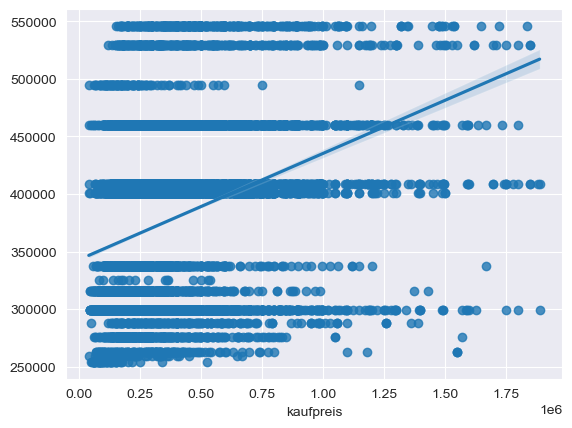

In [15]:
X = df[['einwohner','Bevölkerungsdichte', 'Arbeitslosenquote', 'BIP_pro_einwohner', 'Einkommen', 'Inflation']]
Y = df['kaufpreis']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

print('Intercept:')
print(model.intercept_)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#print(coeff_parameter)

predictions = model.predict(X_test)

sns.regplot(x=y_test, y=predictions)

X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

In [16]:
from stargazer.stargazer import Stargazer
stargazer_tab = Stargazer([ls])
stargazer_tab.custom_columns('Model 1')
stargazer_tab.significant_digits(2)
stargazer_tab.covariate_order(['const', 'einwohner', 'Bevölkerungsdichte', 'Arbeitslosenquote', 'BIP_pro_einwohner', 'Einkommen', 'Inflation'])
stargazer_tab.rename_covariates({
    'einwohner': 'Number of inhabitants', 
    'Bevölkerungsdichte': 'Population density', 
    'const': 'Intercept', 
    'Arbeitslosenquote': 'Unemployment rate',
    'BIP_pro_einwohner': 'GDP per capita', 
    'Einkommen': 'Income per person', 
    'Inflation': 'Inflation'
    })
open('./Regression-Output/regression-1_hk_2022.tex', 'w').write(stargazer_tab.render_latex())
stargazer_tab

## Regression Characteristics and Macroeconomic Factors

### Train and test data set

(53710, 13)
(13428, 13)
(53710,)
(13428,)
Intercept:
-563525.6619913765
                            OLS Regression Results                            
Dep. Variable:              kaufpreis   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     5586.
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:57:29   Log-Likelihood:            -7.2008e+05
No. Observations:               53710   AIC:                         1.440e+06
Df Residuals:                   53696   BIC:                         1.440e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

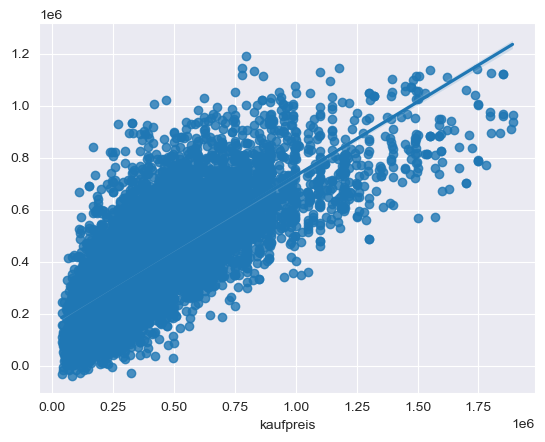

In [18]:
X = df[['wohnflaeche', 'zimmeranzahl', 'schlafzimmer', 'badezimmer', 'aufzug', 'age', 'objektzustand', 'einwohner', 'Bevölkerungsdichte', 'Arbeitslosenquote', 'BIP_pro_einwohner', 'Einkommen', 'Inflation']]
Y = df['kaufpreis']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

print('Intercept:')
print(model.intercept_)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#print(coeff_parameter)

predictions = model.predict(X_test)

sns.regplot(x=y_test, y=predictions)

X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
#print(ls.summary())

In [ ]:
stargazer_tab = Stargazer([ls])
stargazer_tab.custom_columns('Model 1')
stargazer_tab.significant_digits(2)
stargazer_tab.covariate_order(['const', 'einwohner', 'Bevölkerungsdichte', 'Arbeitslosenquote', 'BIP_pro_einwohner', 'Einkommen', 'Inflation', 'wohnflaeche', 'zimmeranzahl', 'schlafzimmer','badezimmer', 'aufzug', 'age', 'objektzustand'])
stargazer_tab.rename_covariates({
    'einwohner': 'Number of inhabitants', 
    'Bevölkerungsdichte': 'Population density', 
    'const': 'Intercept', 
    'Arbeitslosenquote': 'Unemployment rate',
    'BIP_pro_einwohner': 'GDP per capita', 
    'Einkommen': 'Income per person', 
    'Inflation': 'Inflation',
    'age': 'Age', 
    'badezimmer': 'Number of bathrooms', 
    'const': 'Intercept', 
    'grundstuecksflaeche': 'Land area',
    'keller': 'Cellar', 
    'objektzustand': 'Object condition', 
    'parkplatz': 'Parkingspace', 
    'schlafzimmer': 'Number of bedrooms', 
    'wohnflaeche': 'Living space', 
    'zimmeranzahl': 'Number of rooms'
    })
open('./Regression-Output/regression-2_hk_2022.tex', 'w').write(stargazer_tab.render_latex())
stargazer_tab